In [1]:
import pandas as pd
import numpy as np
from model_function import Load_Model

import warnings
warnings.filterwarnings("ignore")

X_train_df = pd.DataFrame(Load_Model("X_train"), columns = Load_Model("features"))
X_test_df = pd.DataFrame(Load_Model("X_test"), columns = Load_Model("features"))
X_test = Load_Model("X_test")
y_test = Load_Model("y_test")
X_train = Load_Model("X_train")
y_train = Load_Model("y_train")
features = Load_Model("features")
model = Load_Model('xgb_model')

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A valu

In [2]:
y_trainxgb = model.predict(X_train)
y_testxgb = model.predict(X_test)

from model_function import predict2SGGlobal
y_trainxgb2 = predict2SGGlobal(X_train)
y_testxgb2 = predict2SGGlobal(X_test)

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



A val

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Linear Regression

In [6]:
# linear regression

lr = LinearRegression()
lr.fit(X_train, y_trainxgb)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
#RSME
import numpy as np
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  9.236540284167251
RMSE:  3.0391676959600717


In [7]:
lr2 = LinearRegression()
lr2.fit(X_train, y_trainxgb2)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_testxgb2, y_pred)
print("MSE: ", mse)
#RSME
import numpy as np
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  10.68194411858996
RMSE:  3.268324359452403


In [18]:
shap_list = ['wind_speed', 'track_distance', 'rainfall_max_6h',
       'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban',
       'mean_elev', 'coast_length', 'total_houses', 'rwi', 'std_slope',
       'mean_slope', 'total_pop', 'mean_tri', 'water', 'rural', 'std_tri',
       'with_coast']

from featurelists import shap_list, lime_list , shap_list_xgb2, lime_list_xgb2

ImportError: cannot import name 'shap_list_xgb2' from 'featurelists' (c:\Users\celin\Documents\VSC Documents\Thesis_2\featurelists.py)

In [17]:
# only use best n variables
n = 5
lr = LinearRegression()
lr.fit(X_train_df[shap_list[:n]], y_trainxgb)
y_pred = lr.predict(X_test_df[shap_list[:n]])


mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  9.27138657998733
RMSE:  3.0448951673230606


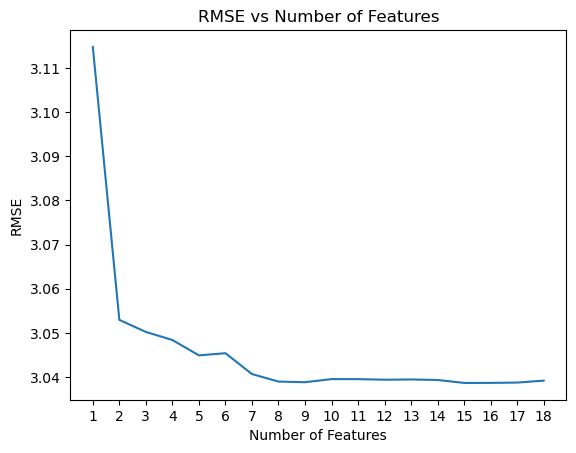

In [10]:
# RSME for all possible n
rmse_list = []
for n in range(1, len(shap_list)+1):
    lr = LinearRegression()
    lr.fit(X_train_df[shap_list[:n]], y_trainxgb)
    y_pred = lr.predict(X_test_df[shap_list[:n]])
    mse = mean_squared_error(y_testxgb, y_pred)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

# plot
import matplotlib.pyplot as plt
plt.plot(rmse_list)
plt.xlabel('Number of Features')
plt.xticks(range(len(shap_list)), list(range(1,19)))
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')
plt.show()


### GLM

In [19]:
df = Load_Model('df')
df

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.




,wind_speed,track_distance,total_houses,rainfall_max_6h,rainfall_max_24h,rwi,mean_slope,std_slope,mean_tri,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged_5years,percent_houses_damaged
0,-0.704686,1.420347,-0.272376,-1.175524,-1.265043,-0.100972,0.691289,0.852915,1.094009,1.008363,-0.617499,-0.352036,0.935205,-0.731012,-1.510670,1.947325,-0.279989,-0.241398,0.0
1,-0.788156,1.673016,-0.270376,-1.133698,-1.255425,1.106914,0.878330,0.504172,0.893696,0.244915,-0.523135,2.853693,0.935205,-0.731012,-1.131296,1.565883,-0.278028,-0.241398,0.0
2,-0.654702,1.277761,-0.272098,-1.168104,-1.229554,-1.320165,1.784406,2.153799,2.099183,2.653361,-0.429186,3.181211,0.935205,-0.731012,-1.212591,1.647621,-0.276812,-0.241398,0.0
3,-0.700491,1.404514,-0.269193,-1.192053,-1.257415,-0.142657,0.468673,0.648387,0.594333,0.773553,-0.564862,2.440864,0.935205,-0.731012,-1.185493,1.620375,-0.265103,-0.241398,0.0
4,-0.743750,1.531266,-0.237499,-1.188679,-1.272174,-0.350679,0.845817,0.509406,0.791717,0.286700,-0.400399,4.370635,0.935205,-0.405585,-0.264156,0.503295,-0.197596,-0.241398,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49749,-1.064795,1.196675,-0.270872,-0.918833,-1.028225,-1.625712,0.232948,1.047870,0.320292,1.146974,-0.627544,-0.546194,0.935205,-0.684523,-1.510670,1.920079,-0.277650,0.534283,0.0
49750,-1.096719,1.324220,-0.213470,-0.932662,-1.067363,0.234747,-0.731858,-0.467369,-0.742849,-0.426405,-0.671409,1.987683,0.935205,-0.498564,-0.995806,1.293424,-0.241674,0.534283,0.0
49751,-1.132933,1.451765,-0.249755,-0.973477,-1.099370,1.060794,-0.733432,-0.545714,-0.691924,-0.451157,-0.694968,0.191214,0.935205,-0.684523,-1.456474,1.865587,-0.241895,0.534283,0.0
49752,-1.160069,1.579301,-0.271725,-0.677320,-0.994939,-0.409290,-0.717276,-0.989344,-0.597840,-0.822308,-0.701709,-0.347840,0.935205,-0.731012,-1.436766,1.873018,-0.273510,0.534283,0.0


In [46]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

#formula = list(map(lambda x: x + " + ", shap_list[:n]))
formula = ' + '.join(shap_list)

model = smf.glm(formula = "percent_houses_damaged ~ "+formula+" + wind_speed*mean_slope",  #~
                data = Load_Model('df'), 
                family = sm.families.Tweedie())

model = smf.glm(formula = "percent_houses_damaged ~ wind_speed + track_distance",# + rainfall_max_6h",  #~
                data = Load_Model('df'), 
                family = sm.families.Tweedie())

# Fit the model
result = model.fit()
# Display and interpret results
print(result.summary())
# Estimated default probabilities
predictions = result.predict(X_test)


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


divide

                   Generalized Linear Model Regression Results                    
Dep. Variable:     percent_houses_damaged   No. Observations:                49754
Model:                                GLM   Df Residuals:                    49751
Model Family:                     Tweedie   Df Model:                            2
Link Function:                        Log   Scale:                          11.522
Method:                              IRLS   Log-Likelihood:                -4210.2
Date:                    Fri, 17 May 2024   Deviance:                       79799.
Time:                            16:20:52   Pearson chi2:                 5.73e+05
No. Iterations:                         9   Pseudo R-squ. (CS):             0.2685
Covariance Type:                nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Inte

In [47]:
mse = mean_squared_error(y_testxgb, predictions)
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

# 1.606875827289083
# 1.602689514859014 incl interaction wind+slope
# 1.410884925757567 only windspeed, rainfall 6h & track distance
# 1.3486913906677438 only windspeed & track distance


MSE:  1.818968467261293
RMSE:  1.3486913906677438


A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


divide by zero encountered in log
invalid value encountered in multiply
A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) in

Text(0.5, 1.0, 'RMSE vs Number of Features')

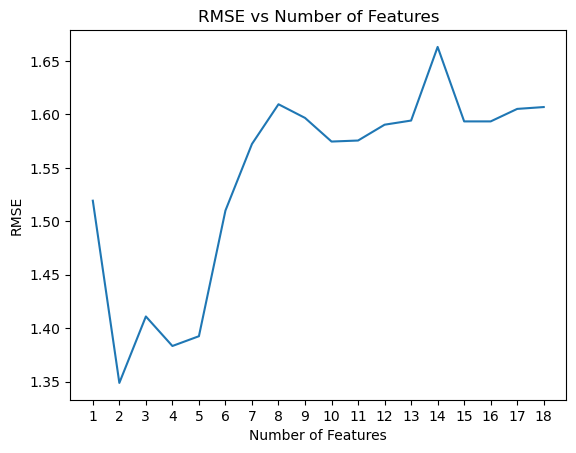

In [41]:
# GLM with different number of features
rmse_list = []
for n in range(1, len(shap_list)+1):
    formula = ' + '.join(shap_list[:n])
    model = smf.glm(formula = "percent_houses_damaged ~ "+formula, 
                data = Load_Model('df'), 
                family = sm.families.Tweedie())
    # Fit the model
    result = model.fit()
    # Display and interpret results
    #print(result.summary())
    # Estimated default probabilities
    predictions = result.predict(X_test)
    mse = mean_squared_error(y_testxgb, predictions)
    rmse = np.sqrt(mse)
    rmse_list.append(rmse)

#plot
import matplotlib.pyplot as plt
plt.plot(rmse_list)
plt.xlabel('Number of Features')
plt.xticks(range(len(shap_list)), list(range(1,19)))
plt.ylabel('RMSE')
plt.title('RMSE vs Number of Features')

## Decision Tree

In [26]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  0.984335079668483
RMSE:  0.992136623489166


[Text(0.5, 0.875, 'wind_speed <= 2.917\nsquared_error = 15.2\nsamples = 39803\nvalue = 0.827'),
 Text(0.25, 0.625, 'wind_speed <= 2.124\nsquared_error = 2.407\nsamples = 39321\nvalue = 0.471'),
 Text(0.125, 0.375, 'wind_speed <= 1.374\nsquared_error = 0.548\nsamples = 37948\nvalue = 0.261'),
 Text(0.0625, 0.125, 'squared_error = 0.154\nsamples = 35175\nvalue = 0.121'),
 Text(0.1875, 0.125, 'squared_error = 2.162\nsamples = 2773\nvalue = 2.033'),
 Text(0.375, 0.375, 'wind_speed <= 2.502\nsquared_error = 18.936\nsamples = 1373\nvalue = 6.271'),
 Text(0.3125, 0.125, 'squared_error = 6.311\nsamples = 773\nvalue = 4.38'),
 Text(0.4375, 0.125, 'squared_error = 24.662\nsamples = 600\nvalue = 8.707'),
 Text(0.75, 0.625, 'wind_speed <= 3.602\nsquared_error = 203.14\nsamples = 482\nvalue = 29.902'),
 Text(0.625, 0.375, 'percent_houses_damaged_5years <= -0.142\nsquared_error = 79.615\nsamples = 346\nvalue = 24.053'),
 Text(0.5625, 0.125, 'squared_error = 57.754\nsamples = 262\nvalue = 21.865'),
 

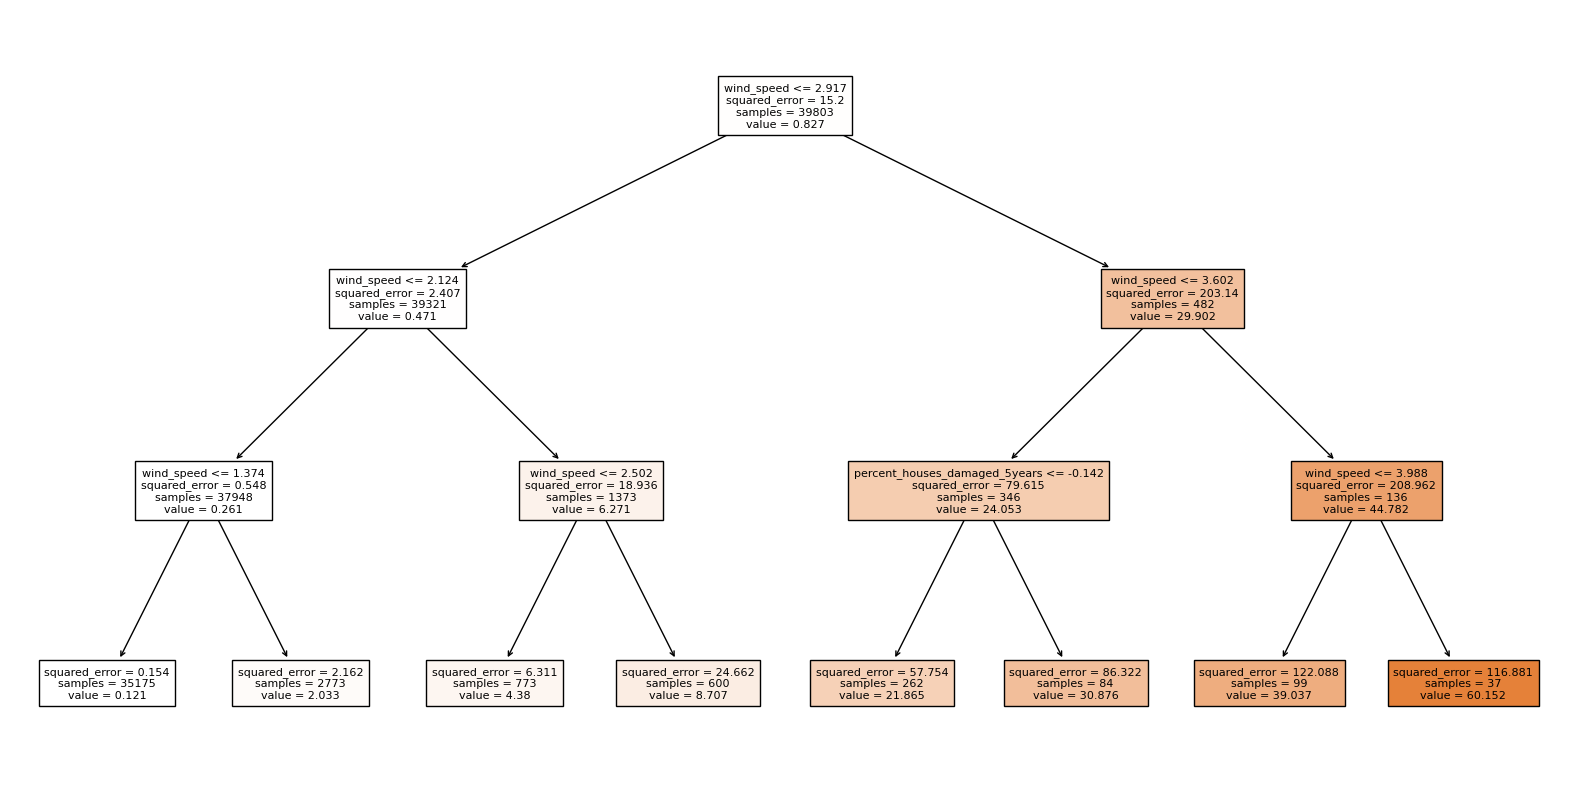

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features, filled=True, fontsize=8)

In [69]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=7)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  0.6413204173504323
RMSE:  0.8008248356228922


### On original y values

In [187]:
# decision tree on original y values
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  13.251587812434389
RMSE:  3.6402730409180006


In [188]:
eval_bins(y_pred, y_test, y_test)

Bin:  [0, 9e-05]  RMSE:  0.9925038591225988
Bin:  [9e-05, 1]  RMSE:  1.961011565538381
Bin:  [1, 10]  RMSE:  5.899085131351293
Bin:  [10, 50]  RMSE:  15.727146918700095
Bin:  [50, 1000]  RMSE:  43.601700789700665
Total RSME 3.6402730409180006


[[[0, 9e-05], 0.9850639103732514, 0.9925038591225988],
 [[9e-05, 1], 3.8455663601752925, 1.961011565538381],
 [[1, 10], 34.7992053869299, 5.899085131351293],
 [[10, 50], 247.34315020237787, 15.727146918700095],
 [[50, 1000], 1901.1083117545834, 43.601700789700665]]

## Others

In [37]:
# elastic net
from sklearn.linear_model import ElasticNet
en = ElasticNet()
en.fit(X_train, y_trainxgb)
y_pred = en.predict(X_test)
mse = mean_squared_error(y_testxgb, y_pred)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  10.651125639782041
RMSE:  3.263606232342076


# Evaluate Performance per bin

In [38]:
pd.DataFrame(y_test).head()

,percent_houses_damaged
50005,0.000000
20438,0.083553
93739,0.000000
119845,0.000000
101875,0.000000


In [39]:
y_train_df = pd.DataFrame(y_train)
X_train_df.head()

,wind_speed,track_distance,total_houses,rainfall_max_6h,rainfall_max_24h,rwi,mean_slope,std_slope,mean_tri,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged_5years
0,-0.856555,1.171554,1.135117,-0.622338,-0.614954,1.760951,-1.253141,-1.761114,-1.230703,-1.630404,-0.736261,1.419780,0.935205,2.616238,-0.995806,-0.532048,0.976106,-0.240661
1,-0.721854,1.615811,-0.266746,-0.775814,-0.955256,0.052833,-0.511528,-0.355795,-0.415348,-0.231075,-0.667434,1.360675,0.935205,-0.731012,-1.348081,1.783850,-0.273998,-0.241398
2,-0.707059,1.334032,-0.251563,-1.082427,-1.104843,0.144409,-0.841787,-1.132003,-0.812952,-1.061138,-0.695688,0.269003,0.935205,-0.731012,-1.429376,1.865587,-0.262936,-0.241398
3,2.279204,-1.611215,2.719272,0.107935,0.628674,3.635261,-0.886581,0.055877,-0.924670,0.161881,-0.583968,0.649223,0.935205,1.872405,-1.293885,0.203590,2.745908,-0.128161
4,-0.640732,-0.426439,0.013277,-0.354515,-0.217106,0.403683,-0.101521,0.727710,-0.090182,0.772969,-0.011754,-0.657215,-1.069284,-0.266117,0.928162,-0.777261,-0.147534,-0.241248


Text(0.5, 1.0, 'Target variable bins')

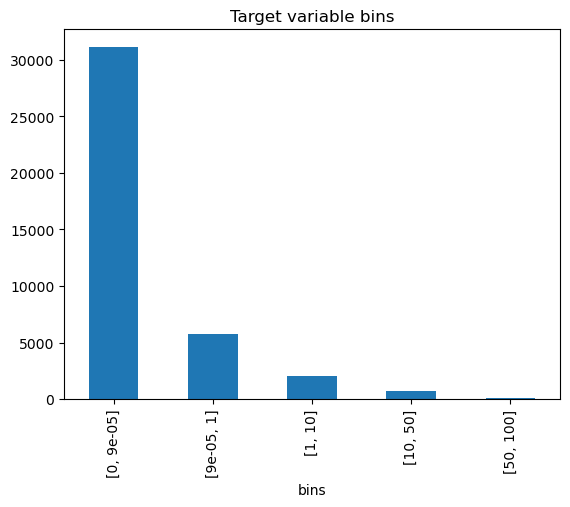

In [40]:
# histogram y_train
import matplotlib.pyplot as plt
bins = [[0, 0.00009], [0.00009, 1], [1,10],[10,50], [50,100]]

# create table with count of y_train values in each bin
y_train_df = pd.DataFrame(y_train)
y_train_df['bins'] = None
for v in bins:
    y_train_df.loc[(y_train_df['percent_houses_damaged'] >= v[0]) & (y_train_df['percent_houses_damaged'] <= v[1]), 'bins'] = str(v)
y_train_df['bins'].value_counts().plot(kind='bar') 
plt.title("Target variable bins")

In [244]:
def eval_bins(ypred, ytrue, ybins):
    bins = [[0, 0.00009], [0.00009, 1], [1,10],[10,50], [50,1000]]

    ypred, ytrue, ybins = np.array(ypred), np.array(ytrue), np.array(ybins)

    y_df = pd.DataFrame(np.array(ybins), columns=['y_bins'])
    y_df['y_pred'] = ypred
    y_df['y_true'] = ytrue
    y_df['bins'] = None
    for v in bins:
        y_df.loc[(y_df['y_bins'] >= v[0]) & (y_df['y_bins'] <= v[1]), 'bins'] = str(v)

    eval = []
    for v in bins:
        if y_df[y_df['bins'] == str(v)].shape[0] == 0:
            continue
        y_v = y_df[y_df['bins'] == str(v)]
        mse = mean_squared_error(y_v['y_true'], y_v['y_pred'])
        rmse = np.sqrt(mse)

        #MAE
        mae = np.mean(np.abs(y_v['y_true'] - y_v['y_pred']))

        eval.append([v, mse, rmse, mae])

        print("Bin: {:<15} RMSE: {:.3f}, MAE: {:.3f}".format(str(v), rmse, mae))

    print("Total RSME", np.sqrt(mean_squared_error(y_df['y_true'], y_df['y_pred'])))

    return eval

In [229]:
# Linear Regression RSME for each bin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(X_train, y_trainxgb)
y_pred = lr.predict(X_test)

# y_test_df = pd.DataFrame(np.array(y_test), columns = ['percent_houses_damaged'])
# y_test_df
# y_test_df["y_testxgb"] = y_testxgb
# y_test_df['bins'] = None
# for v in bins:
#     y_test_df.loc[(y_test_df['percent_houses_damaged'] >= v[0]) & (y_test_df['percent_houses_damaged'] <= v[1]), 'bins'] = str(v)
# y_test_df["y_pred_LR"] = y_pred

# for v in bins:
#     y_test_df_v = y_test_df[y_test_df['bins'] == str(v)]
#     mse = mean_squared_error(y_test_df_v['y_testxgb'], y_test_df_v['y_pred_LR'])
#     rmse = np.sqrt(mse)
#     print("Bin: ", v, " RMSE: ", rmse)

# print("Total RSME", np.sqrt(mean_squared_error(y_test_df['y_testxgb'], y_test_df['y_pred_LR'])))

In [245]:
eval_bins(y_pred, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 1.497, MAE: 1.074
Bin: [9e-05, 1]      RMSE: 2.164, MAE: 1.698
Bin: [1, 10]         RMSE: 3.704, MAE: 2.526
Bin: [10, 50]        RMSE: 14.032, MAE: 9.122
Bin: [50, 1000]      RMSE: 28.513, MAE: 23.024
Total RSME 3.027593887105412


[[[0, 9e-05], 2.241614609433083, 1.4972022606959565, 1.0743891862130817],
 [[9e-05, 1], 4.683767833791299, 2.16420143096508, 1.697591343420735],
 [[1, 10], 13.716852910956025, 3.703626994036525, 2.5259108840093347],
 [[10, 50], 196.88541943900324, 14.031586490450866, 9.122146234064356],
 [[50, 1000], 813.0181462819087, 28.513473065936893, 23.023955912682815]]

In [246]:
# Decision Tree RSME for each bin
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)

eval_bins(y_pred, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.445, MAE: 0.145
Bin: [9e-05, 1]      RMSE: 0.807, MAE: 0.399
Bin: [1, 10]         RMSE: 1.954, MAE: 1.122
Bin: [10, 50]        RMSE: 4.675, MAE: 3.275
Bin: [50, 1000]      RMSE: 7.168, MAE: 5.156
Total RSME 1.000711746263956


[[[0, 9e-05], 0.19819492528121813, 0.44519088634114934, 0.14549383568882826],
 [[9e-05, 1], 0.6505010044054105, 0.8065364247232796, 0.39868617369358245],
 [[1, 10], 3.8191116749915146, 1.9542547620490822, 1.1220217321469579],
 [[10, 50], 21.859690323695396, 4.675434773761195, 3.2746360310181064],
 [[50, 1000], 51.38445099856264, 7.168294845956229, 5.156324227443579]]

In [247]:
# Decision Tree RSME for each bin
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train, y_trainxgb)
y_pred = dt.predict(X_test)

eval_bins(y_pred, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.466, MAE: 0.188
Bin: [9e-05, 1]      RMSE: 0.926, MAE: 0.444
Bin: [1, 10]         RMSE: 2.495, MAE: 1.317
Bin: [10, 50]        RMSE: 5.334, MAE: 3.790
Bin: [50, 1000]      RMSE: 7.490, MAE: 6.062
Total RSME 1.1428468056467276


[[[0, 9e-05], 0.21738210752614742, 0.46624254152334427, 0.1879465910392049],
 [[9e-05, 1], 0.8571344556759586, 0.9258155624507284, 0.44409485098527324],
 [[1, 10], 6.225583225898218, 2.495111866409644, 1.3170827464089399],
 [[10, 50], 28.451934746162276, 5.3340355028966835, 3.7903093261734897],
 [[50, 1000], 56.09750490920579, 7.489826760960883, 6.061532415484884]]

# Function based tree
## EDA - Partial dependence plots

In [44]:
features

['wind_speed',
 'track_distance',
 'total_houses',
 'rainfall_max_6h',
 'rainfall_max_24h',
 'rwi',
 'mean_slope',
 'std_slope',
 'mean_tri',
 'std_tri',
 'mean_elev',
 'coast_length',
 'with_coast',
 'urban',
 'rural',
 'water',
 'total_pop',
 'percent_houses_damaged_5years']

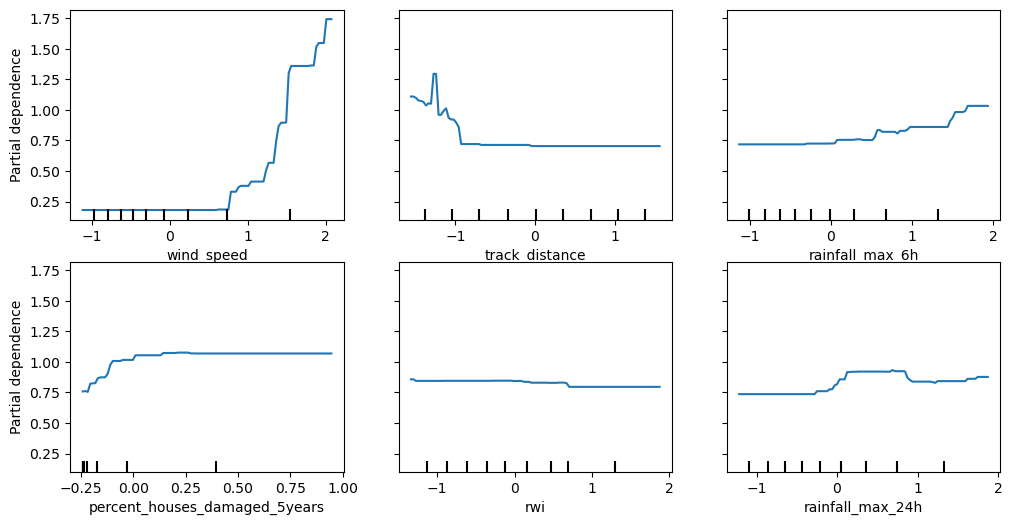

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence

fig, ax = plt.subplots(figsize=(12, 6))
# show grid
ax.grid(True)
display = PartialDependenceDisplay.from_estimator( model, X_train_df, ["wind_speed", "track_distance", "rainfall_max_6h", "percent_houses_damaged_5years", "rwi", "rainfall_max_24h"], ax=ax)
#plt.show()

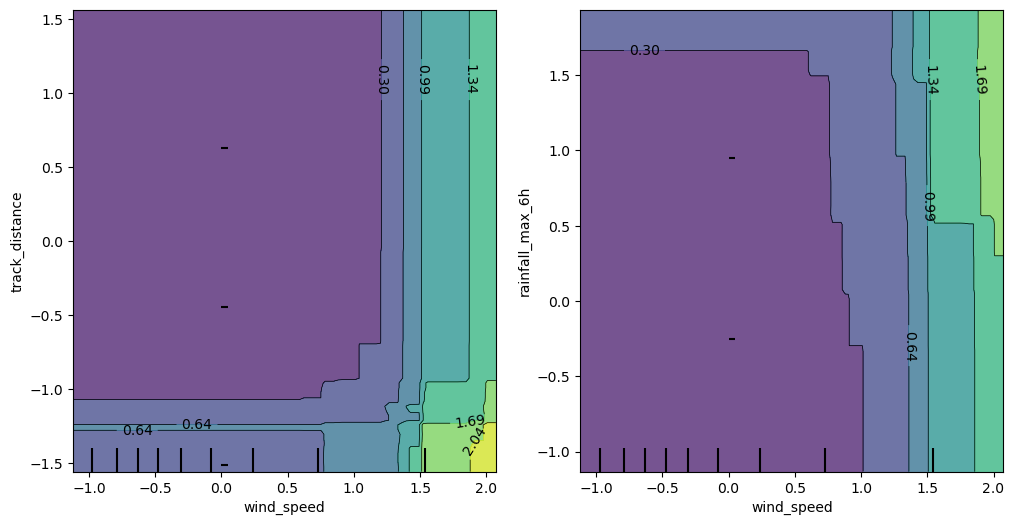

In [29]:
fig, ax = plt.subplots(figsize=(12, 6))
display = PartialDependenceDisplay.from_estimator( model, X_train_df, [("wind_speed", "track_distance"), ("wind_speed", "rainfall_max_6h")], ax=ax)

In [45]:
#max value in windspeed
X_train_df["wind_speed"].max()
y_testxgb_df = pd.DataFrame(y_testxgb)
y_trainxgb_df = pd.DataFrame(y_trainxgb)
y_testxgb_df

,0
0,-0.030171
1,0.529008
2,0.133954
3,0.049151
4,0.073128
...,...
9946,0.082351
9947,-0.034028
9948,0.663063
9949,3.629068


In [46]:
y_test_df

,percent_houses_damaged,y_testxgb,bins,y_pred_LR,y_pred_DT
50005,0.000000,-0.030171,"[0, 9e-05]",0.099310,0.133423
20438,0.083553,0.529008,"[9e-05, 1]",5.300585,1.991995
93739,0.000000,0.133954,"[0, 9e-05]",-0.027521,0.133423
119845,0.000000,0.049151,"[0, 9e-05]",0.592451,0.133423
101875,0.000000,0.073128,"[0, 9e-05]",0.923265,0.133423
...,...,...,...,...,...
7841,0.000000,0.082351,"[0, 9e-05]",-1.135530,0.133423
136725,0.000000,-0.034028,"[0, 9e-05]",-1.686567,0.133423
12550,0.000000,0.663063,"[0, 9e-05]",2.199620,0.133423
32170,6.803083,3.629068,"[1, 10]",5.727515,4.265249


## First attempt

In [306]:
# test simple function tree model
splits = [0.75, 1.5, 1.75, 5]

# split X_train into 3 groups
X_train_split = X_train_df.copy()
X_train_split['group'] = None
for i, split in enumerate(splits):
    if i == 0:
        X_train_split.loc[X_train_split['wind_speed'] <= split, 'group'] = i
    else:
        X_train_split.loc[(X_train_split['wind_speed'] > splits[i-1]) & (X_train_split['wind_speed'] <= split), 'group'] = i

X_train_split['group'].value_counts()	

# train linear model for each group
models = []
for i in range(4):
    X_train_group = X_train_split[X_train_split['group'] == i]
    y_train_group = y_trainxgb_df[y_trainxgb_df.index.isin(X_train_group.index)]
    lr = LinearRegression()
    lr.fit(X_train_group.drop(columns="group"), y_train_group)
    models.append(lr)


models[0]

LinearRegression()

In [310]:
# reset indices of y_test_df
y_test_df = y_test_df.reset_index(drop=True)
print(y_test_df.shape)
print(X_test_df.shape)

(9951, 6)
(9951, 18)


In [311]:
X_test_group = X_test_df.copy()
X_test_group['group'] = None

for i, split in enumerate(splits):
    if i == 0:
        X_test_group.loc[X_test_group['wind_speed'] <= split, 'group'] = i
    else:
        X_test_group.loc[(X_test_group['wind_speed'] > splits[i-1]) & (X_test_group['wind_speed'] <= split), 'group'] = i

In [312]:
# X_test_group with group == 2
X_test_group.loc[X_test_group['group']==0]

,wind_speed,track_distance,total_houses,rainfall_max_6h,rainfall_max_24h,rwi,mean_slope,std_slope,mean_tri,std_tri,mean_elev,coast_length,with_coast,urban,rural,water,total_pop,percent_houses_damaged_5years,group
0,-0.553965,0.824593,-0.108198,-0.563647,-0.178465,-0.008619,0.314516,1.836731,0.378383,2.191690,0.187710,-0.657215,-1.069284,-0.080158,0.819770,-0.777261,-0.125015,1.349075,0
2,-0.489344,0.163372,-0.081059,0.655724,0.244259,-0.968642,-0.536983,-0.525457,-0.464313,-0.484082,-0.643224,-0.278337,0.935205,-0.312606,0.901064,-0.722769,-0.076355,0.647851,0
3,-0.133500,-0.271994,-0.270355,-0.410508,-0.650941,-0.508069,0.293585,0.357728,0.275629,0.359119,-0.572785,0.446924,0.935205,-0.731012,-1.375180,1.811096,-0.268364,-0.223632,0
4,0.362534,-0.947899,-0.047338,-0.949190,-0.974327,0.162867,0.307906,1.148953,0.278745,1.184207,-0.263660,-0.657215,-1.069284,0.617186,0.413298,-0.777261,0.006422,-0.237978,0
5,0.317545,-0.601355,-0.153428,4.044664,2.977453,-0.910758,-0.539468,-0.428360,-0.542570,-0.432333,-0.548813,0.612064,0.935205,-0.405585,0.169414,0.067361,-0.149480,-0.006197,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,-0.698694,0.941246,-0.062058,-1.210267,-1.279969,-0.190702,-0.650799,-0.171668,-0.652598,-0.196791,-0.391512,-0.657215,-1.069284,-0.126648,0.846868,-0.777261,-0.033219,0.953119,0
9945,-0.473829,1.343660,0.083426,-1.010581,-0.962221,0.675084,-0.453595,-0.340413,-0.450781,-0.409439,-0.588164,2.276153,0.935205,1.361019,-0.616432,-0.177852,0.358045,-0.241398,0
9946,-1.050857,1.124671,-0.175754,0.820668,1.179923,-0.222467,0.672710,1.226756,0.650708,1.197646,0.033110,-0.657215,-1.069284,-0.266117,0.928162,-0.777261,-0.139468,0.990301,0
9947,-1.357214,1.431274,0.046389,-0.900281,-0.993399,0.437662,-0.444384,0.191763,-0.381543,0.267485,-0.438933,0.159366,0.935205,0.338248,0.494592,-0.695523,-0.055362,-0.241398,0


In [313]:
# predict y_test for each group
#y_pred_array = pd.DataFrame(np.zeros(len(y_test_df)))
y_test_df["FunctionTree"]  = None

#count X_test_group
print(X_test_group['group'].value_counts())

for i in range(4):
    #print(i)
    X_test_group_i = X_test_group[X_test_group['group'] == i]
    #print(X_test_group.shape)
    y_pred = models[i].predict(X_test_group_i.drop(columns=['group']))
    y_test_df.loc[X_test_group_i.index, 'FunctionTree'] = y_pred

y_test_df

group
0    7940
1     952
3     816
2     243
Name: count, dtype: int64


,percent_houses_damaged,y_testxgb,bins,y_pred_LR,y_pred_DT,FunctionTree
0,0.000000,-0.030171,"[0, 9e-05]",0.099310,0.133423,-0.007401
1,0.083553,0.529008,"[9e-05, 1]",5.300585,1.991995,0.106489
2,0.000000,0.133954,"[0, 9e-05]",-0.027521,0.133423,0.198357
3,0.000000,0.049151,"[0, 9e-05]",0.592451,0.133423,0.159703
4,0.000000,0.073128,"[0, 9e-05]",0.923265,0.133423,0.039666
...,...,...,...,...,...,...
9946,0.000000,0.082351,"[0, 9e-05]",-1.135530,0.133423,0.135362
9947,0.000000,-0.034028,"[0, 9e-05]",-1.686567,0.133423,-0.082058
9948,0.000000,0.663063,"[0, 9e-05]",2.199620,0.133423,1.287055
9949,6.803083,3.629068,"[1, 10]",5.727515,4.265249,2.063731


In [314]:
# evaluate Function Tree Result
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree'])
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

MSE:  2.361295710473005
RMSE:  1.536650809544252


In [315]:
# evaluate per bin
bins = [[0, 0.00009], [0.00009, 1], [1,10],[10,50], [50,100]]

for v in bins:
    y_test_df_v = y_test_df[y_test_df['bins'] == str(v)]
    mse = mean_squared_error(y_test_df_v['y_testxgb'], y_test_df_v['FunctionTree'])
    rmse = np.sqrt(mse)
    print("Bin: ", v, " RMSE: ", rmse)

print("Total RSME", np.sqrt(mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree'])))

Bin:  [0, 9e-05]  RMSE:  0.6263588006748695
Bin:  [9e-05, 1]  RMSE:  1.5147239518633215
Bin:  [1, 10]  RMSE:  3.442147682125313
Bin:  [10, 50]  RMSE:  5.950279862218105
Bin:  [50, 100]  RMSE:  12.501350639005047
Total RSME 1.536650809544252


## Function solution - Windspeed separation

In [248]:
def predfunctiontree(X, models, conditions, n= 18, featlist = None):
    if featlist is None:
        featlist = X.columns
    fullprediction = []
    for index, row in X.iterrows():
        i = pd.DataFrame(row).transpose()
        i = i[featlist[:n]]
        case = matchfunction(row, conditions)
        predi = models[case].predict(i)[0][0]
        fullprediction.append(predi)
    return fullprediction

def matchfunction(x, condition):
    for f, cond in zip(condition.keys(), condition.values()):
        case = f
        for c in cond.keys():
            if x[c] > cond[c]:
                case = None
                break
        if case is not None:
            return case
    raise ValueError("No case found")

In [249]:
conditionsT1 = {1: {"wind_speed": 0.75}, 
                2: {"wind_speed": 1.5}, 
                3: {"wind_speed": 1.75}, 
                4: {"wind_speed": 5}
                }	

matchfunction(X_test_df.iloc[1], conditionsT1)

4

In [250]:
n = 5
lr = LinearRegression()
lr.fit(X_train_df[shap_list[:n]], y_trainxgb)
y_pred = lr.predict(X_test_df[shap_list[:n]])

In [251]:
def buildfunctions(X, y, conditions, n = 18, featlist = None):
    if featlist is None:
        featlist = X.columns
    y = pd.DataFrame(y)
    y = y.reset_index(drop = True)
    models = {}

    X = X[featlist[:n]]

    unassigned = X.index
    for g, cond in zip(conditions.keys(), conditions.values()):
        idx = unassigned
        for c in cond.keys():
            # collect indexes of all conditions and take intersection
            idx_cond = X.loc[X[c] < cond[c]].index
            idx = idx_cond.intersection(idx)
        unassigned = unassigned.difference(idx) #update unassigned indices
        X_group = X.loc[idx]
        y_group = y.loc[idx]

        lr = LinearRegression()
        lr.fit(X_group, y_group)
        models[g] = lr
    return models

In [252]:
models2 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1)
models2

{1: LinearRegression(),
 2: LinearRegression(),
 3: LinearRegression(),
 4: LinearRegression()}

In [253]:
p = predfunctiontree(X_test_df, models2, conditionsT1)

In [254]:
y_test_df["FunctionTree3"]  = p
y_test_df

,percent_houses_damaged,y_testxgb,bins,y_pred_LR,FunctionTree_App2,FunctionTree3
0,0.000000,-0.030171,"[0, 9e-05]",0.061169,0.059568,-0.007992
1,0.083553,0.529008,"[9e-05, 1]",1.167112,1.792750,0.120535
2,0.000000,0.133954,"[0, 9e-05]",0.176567,0.121877,0.197635
3,0.000000,0.049151,"[0, 9e-05]",0.161852,0.070401,0.159305
4,0.000000,0.073128,"[0, 9e-05]",0.314795,0.103826,0.039005
...,...,...,...,...,...,...
9946,0.000000,0.082351,"[0, 9e-05]",0.008768,0.097518,0.134830
9947,0.000000,-0.034028,"[0, 9e-05]",-0.451682,-0.164037,-0.082852
9948,0.000000,0.663063,"[0, 9e-05]",0.845675,1.752370,1.291247
9949,6.803083,3.629068,"[1, 10]",2.158308,0.576187,2.073660


In [255]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree3'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  2.3614053277486353
RMSE:  1.5366864767247206


### Wind speed 2

In [256]:
conditionsT1b = {
                1: {"wind_speed": 2.1}, 
                2: {"wind_speed": 2.9}, 
                3: {"wind_speed": 3.6}, 
                4: {"wind_speed": 5}
                }	

In [269]:
models = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1b)
p = predfunctiontree(X_test_df, models, conditionsT1b)
y_test_df["FunctionTree_App2"]  = p

In [271]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_App2'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))
eval_bins(y_test_df['FunctionTree_App2'], y_test_df['y_testxgb'], y_test_df['percent_houses_damaged'])

#RMSE:  1.0310868874517707 - 4 split
#RSME: 1.4020251644747304 - 2 split

MSE:  1.0631401694749802
RMSE:  1.0310868874517707
Bin: [0, 9e-05]      RMSE: 0.518, MAE: 0.253
Bin: [9e-05, 1]      RMSE: 0.796, MAE: 0.491
Bin: [1, 10]         RMSE: 2.217, MAE: 1.204
Bin: [10, 50]        RMSE: 4.236, MAE: 2.915
Bin: [50, 1000]      RMSE: 7.770, MAE: 6.128
Total RSME 1.0310868874517707


[[[0, 9e-05], 0.26808279282262193, 0.517767122191649, 0.2530540517627801],
 [[9e-05, 1], 0.6329614947049828, 0.7955887723598057, 0.4914158541505432],
 [[1, 10], 4.916939722581767, 2.2174173541716877, 1.2037321430235142],
 [[10, 50], 17.940927845664874, 4.23567324585654, 2.9154217075364093],
 [[50, 1000], 60.379913982162655, 7.770451337095076, 6.1283032627163925]]

In [260]:
# reduce n 
models = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1b, n = 5, featlist = shap_list)
p = predfunctiontree(X_test_df, models, conditionsT1b, n = 5, featlist = shap_list)
y_test_df["FunctionTree_App2"]  = p

In [261]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_App2'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

# RSME: 1.4168701228705365 # 2 split
# RSME: 1.0207850801181269 # 4 split - 5 var (shap) better than more variables!

MSE:  0.996163333492561
RMSE:  0.998079823206822


In [262]:
eval_bins(p, y_testxgb, y_test)

Bin: [0, 9e-05]      RMSE: 0.474, MAE: 0.249
Bin: [9e-05, 1]      RMSE: 0.845, MAE: 0.515
Bin: [1, 10]         RMSE: 2.308, MAE: 1.222
Bin: [10, 50]        RMSE: 3.847, MAE: 2.582
Bin: [50, 1000]      RMSE: 7.601, MAE: 5.859
Total RSME 0.998079823206822


[[[0, 9e-05], 0.22506572681904993, 0.47441092611685276, 0.2491969861144516],
 [[9e-05, 1], 0.7140039158845661, 0.8449875240999515, 0.5154717455769346],
 [[1, 10], 5.324978163292944, 2.3075914203543366, 1.222015882674424],
 [[10, 50], 14.797699820172344, 3.846777849079973, 2.582384520419049],
 [[50, 1000], 57.77010278055218, 7.600664627554105, 5.859098892283515]]

In [286]:
rsme = []
for i in [1,2,3,4,5,6,8,10,12]:
    models = buildfunctions(X_train_df, y_trainxgb_df, conditionsT1b, n = i, featlist = shap_list)
    p = predfunctiontree(X_test_df, models, conditionsT1b, n = i, featlist = shap_list)
    mse = mean_squared_error(y_test_df['y_testxgb'], p)
    rsme.append(np.sqrt(mse))

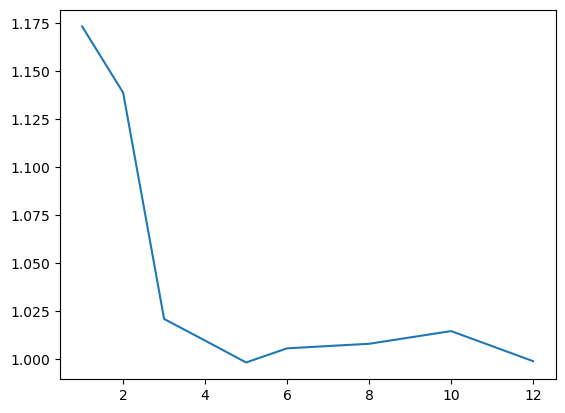

In [291]:
# plot rsme
import matplotlib.pyplot as plt
plt.plot([1,2,3,4,5,6,8,10,12], rsme)

### Actual y values 

In [155]:
models = buildfunctions(X_train_df, y_train, conditionsT1b, n = 5, featlist = shap_list)
p = predfunctiontree(X_test_df, models, conditionsT1b, n = 5, featlist = shap_list)

In [185]:
eval_bins(p, y_test, y_test)

Bin:  [0, 9e-05]  RMSE:  1.1745821970608672
Bin:  [9e-05, 1]  RMSE:  2.1358921571543954
Bin:  [1, 10]  RMSE:  4.9361261424164935
Bin:  [10, 50]  RMSE:  15.291889201112133
Bin:  [50, 1000]  RMSE:  44.708939075647244
Total RSME 3.6281504839151832


[[[0, 9e-05], 1.3796433376523336, 1.1745821970608672],
 [[9e-05, 1], 4.562035306993657, 2.1358921571543954],
 [[1, 10], 24.365341293847532, 4.9361261424164935],
 [[10, 50], 233.84187533908985, 15.291889201112133],
 [[50, 1000], 1998.889233269937, 44.708939075647244]]

In [272]:
# Performance original XGBoost
eval_bins(y_testxgb, y_test, y_test)

Bin: [0, 9e-05]      RMSE: 1.114, MAE: 0.221
Bin: [9e-05, 1]      RMSE: 2.083, MAE: 0.852
Bin: [1, 10]         RMSE: 4.737, MAE: 2.936
Bin: [10, 50]        RMSE: 14.318, MAE: 11.454
Bin: [50, 1000]      RMSE: 42.467, MAE: 36.253
Total RSME 3.437722289829286


[[[0, 9e-05], 1.2404707237167598, 1.1137642136990935, 0.22076951470743894],
 [[9e-05, 1], 4.3388958297606, 2.0830016394042037, 0.8516535821874164],
 [[1, 10], 22.442655449687813, 4.737367987573671, 2.935704337863973],
 [[10, 50], 205.00001285545153, 14.317821512208187, 11.45426664728321],
 [[50, 1000], 1803.4574301225628, 42.467133528442474, 36.25259661485339]]

## Approach 2 - windspeed + track_distance

In [204]:
conditionsT2 = {1: {"wind_speed": 2.9, "track_distance": -1}, 
                2: {"wind_speed": 2.9, "track_distance": 5}, 
                3: {"wind_speed": 5, "track_distance": -1.3}, 
                4: {"wind_speed": 5, "track_distance": 5}, 
                }	

In [205]:
models3 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT2)
p = predfunctiontree(X_test_df, models3, conditionsT2)
y_test_df["FunctionTree_App2"]  = p

In [58]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_App2'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  1.4836260946813777
RMSE:  1.2180419100677027


In [211]:
models3 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT2, n = 5, featlist = shap_list)
p = predfunctiontree(X_test_df, models3, conditionsT2, n = 5, featlist = shap_list)
y_test_df["FunctionTree_App2"]  = p

In [60]:
mse = mean_squared_error(y_test_df['y_testxgb'], y_test_df['FunctionTree_App2'])
print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

MSE:  1.4347031654395122
RMSE:  1.1977909523115926


In [124]:
eval_bins(p, y_testxgb, y_test)

Bin:  [0, 9e-05]  RMSE:  0.5447208083464619
Bin:  [9e-05, 1]  RMSE:  1.0613600451858
Bin:  [1, 10]  RMSE:  2.462310869166272
Bin:  [10, 50]  RMSE:  5.20091926773047
Bin:  [50, 100]  RMSE:  8.792500143698566
Total RSME 1.1977909523115926


[[[0, 9e-05], 0.2967207590456228, 0.5447208083464619],
 [[9e-05, 1], 1.1264851455168035, 1.0613600451858],
 [[1, 10], 6.062974816414361, 2.462310869166272],
 [[10, 50], 27.049561229450045, 5.20091926773047],
 [[50, 100], 77.3080587769393, 8.792500143698566]]

In [220]:
LRweights = pd.DataFrame(columns = ['Model 1', "Model 2"], index = shap_list[:5])
LRweights['Model 1'] = models3[1].coef_[0]
LRweights["Model 2"] = models3[2].coef_[0]
LRweights["Model 3"] = models3[3].coef_[0]
LRweights["Model 4"] = models3[4].coef_[0]
LRweights


,Model 1,Model 2,Model 3,Model 4
wind_speed,1.471614,0.222264,28.310678,21.186478
track_distance,-1.627347,0.047292,-20.107610,-3.754671
rainfall_max_6h,0.557796,0.056193,2.840780,0.922602
percent_houses_damaged_5years,0.432224,0.011632,3.558273,-0.041687
rainfall_max_24h,0.248998,0.044600,-6.302128,-5.295568


### Actual y values

In [195]:
models3 = buildfunctions(X_train_df, y_train, conditionsT2, n=5, featlist = shap_list)
p = predfunctiontree(X_test_df, models3, conditionsT2, n=5, featlist = shap_list)
eval_bins(p, y_test, y_test)

Bin:  [0, 9e-05]  RMSE:  1.2118588817191263
Bin:  [9e-05, 1]  RMSE:  2.2656969927658883
Bin:  [1, 10]  RMSE:  4.562105102088948
Bin:  [10, 50]  RMSE:  15.792126596197493
Bin:  [50, 1000]  RMSE:  44.37330740973127
Total RSME 3.651846468305194


[[[0, 9e-05], 1.4686019492015314, 1.2118588817191263],
 [[9e-05, 1], 5.133382863028389, 2.2656969927658883],
 [[1, 10], 20.812802962506005, 4.562105102088948],
 [[10, 50], 249.39126243032823, 15.792126596197493],
 [[50, 1000], 1968.990410478512, 44.37330740973127]]

### Approach 3: Rainfall

In [198]:
conditionsT3 = {1: {"wind_speed": 2.9, "track_distance": -1}, 
                2: {"wind_speed": 2.9, "track_distance": 5} , 
                3: {"wind_speed": 5, "track_distance": -1.3, "rainfall_max_6h": 0.5}, 
                4: {"wind_speed": 5, "track_distance": 5, "rainfall_max_6h": 0.5},
                5: {"wind_speed": 5, "track_distance": -1.3, "rainfall_max_6h": 5}, 
                6: {"wind_speed": 5, "track_distance": 5, "rainfall_max_6h": 5},  
                }	

In [201]:
models3 = buildfunctions(X_train_df, y_trainxgb_df, conditionsT3)
p = predfunctiontree(X_test_df, models3, conditionsT3)
eval_bins(p, y_testxgb, y_test)

Bin:  [0, 9e-05]  RMSE:  0.5353917958057893
Bin:  [9e-05, 1]  RMSE:  0.9970979285832655
Bin:  [1, 10]  RMSE:  2.542384866991887
Bin:  [10, 50]  RMSE:  5.886179459300456
Bin:  [50, 1000]  RMSE:  10.279765901103318
Total RSME 1.285317219191378


[[[0, 9e-05], 0.28664437501614803, 0.5353917958057893],
 [[9e-05, 1], 0.9942042791850388, 0.9970979285832655],
 [[1, 10], 6.463720811909354, 2.542384866991887],
 [[10, 50], 34.6471086270906, 5.886179459300456],
 [[50, 1000], 105.67358698148651, 10.279765901103318]]

In [202]:
models3 = buildfunctions(X_train_df, y_train, conditionsT3)
p = predfunctiontree(X_test_df, models3, conditionsT3)
eval_bins(p, y_test, y_test)

Bin:  [0, 9e-05]  RMSE:  1.2078416167011596
Bin:  [9e-05, 1]  RMSE:  2.0413542166725875
Bin:  [1, 10]  RMSE:  5.06318003595914
Bin:  [10, 50]  RMSE:  16.799502786918136
Bin:  [50, 1000]  RMSE:  44.09169294682471
Total RSME 3.7380263058448095


[[[0, 9e-05], 1.4588813710352708, 1.2078416167011596],
 [[9e-05, 1], 4.167127037926953, 2.0413542166725875],
 [[1, 10], 25.635792076535196, 5.06318003595914],
 [[10, 50], 282.22329388767025, 16.799502786918136],
 [[50, 1000], 1944.0773869170719, 44.09169294682471]]

## More EDA

MSE:  11.079128950142737
RMSE:  3.3285325520629563


[Text(0.5, 0.875, 'track_distance <= -1.302\nsquared_error = 15.126\nsamples = 39803\nvalue = 0.835'),
 Text(0.25, 0.625, 'rainfall_max_24h <= -0.03\nsquared_error = 94.027\nsamples = 4898\nvalue = 5.089'),
 Text(0.125, 0.375, 'water <= -1.459\nsquared_error = 44.159\nsamples = 1066\nvalue = 1.584'),
 Text(0.0625, 0.125, 'squared_error = 316.877\nsamples = 53\nvalue = 8.323'),
 Text(0.1875, 0.125, 'squared_error = 27.39\nsamples = 1013\nvalue = 1.232'),
 Text(0.375, 0.375, 'track_distance <= -1.425\nsquared_error = 103.532\nsamples = 3832\nvalue = 6.064'),
 Text(0.3125, 0.125, 'squared_error = 125.247\nsamples = 2710\nvalue = 6.916'),
 Text(0.4375, 0.125, 'squared_error = 45.103\nsamples = 1122\nvalue = 4.007'),
 Text(0.75, 0.625, 'track_distance <= -1.029\nsquared_error = 1.158\nsamples = 34905\nvalue = 0.238'),
 Text(0.625, 0.375, 'rainfall_max_6h <= 2.754\nsquared_error = 9.481\nsamples = 3150\nvalue = 1.627'),
 Text(0.5625, 0.125, 'squared_error = 8.122\nsamples = 3138\nvalue = 1.5

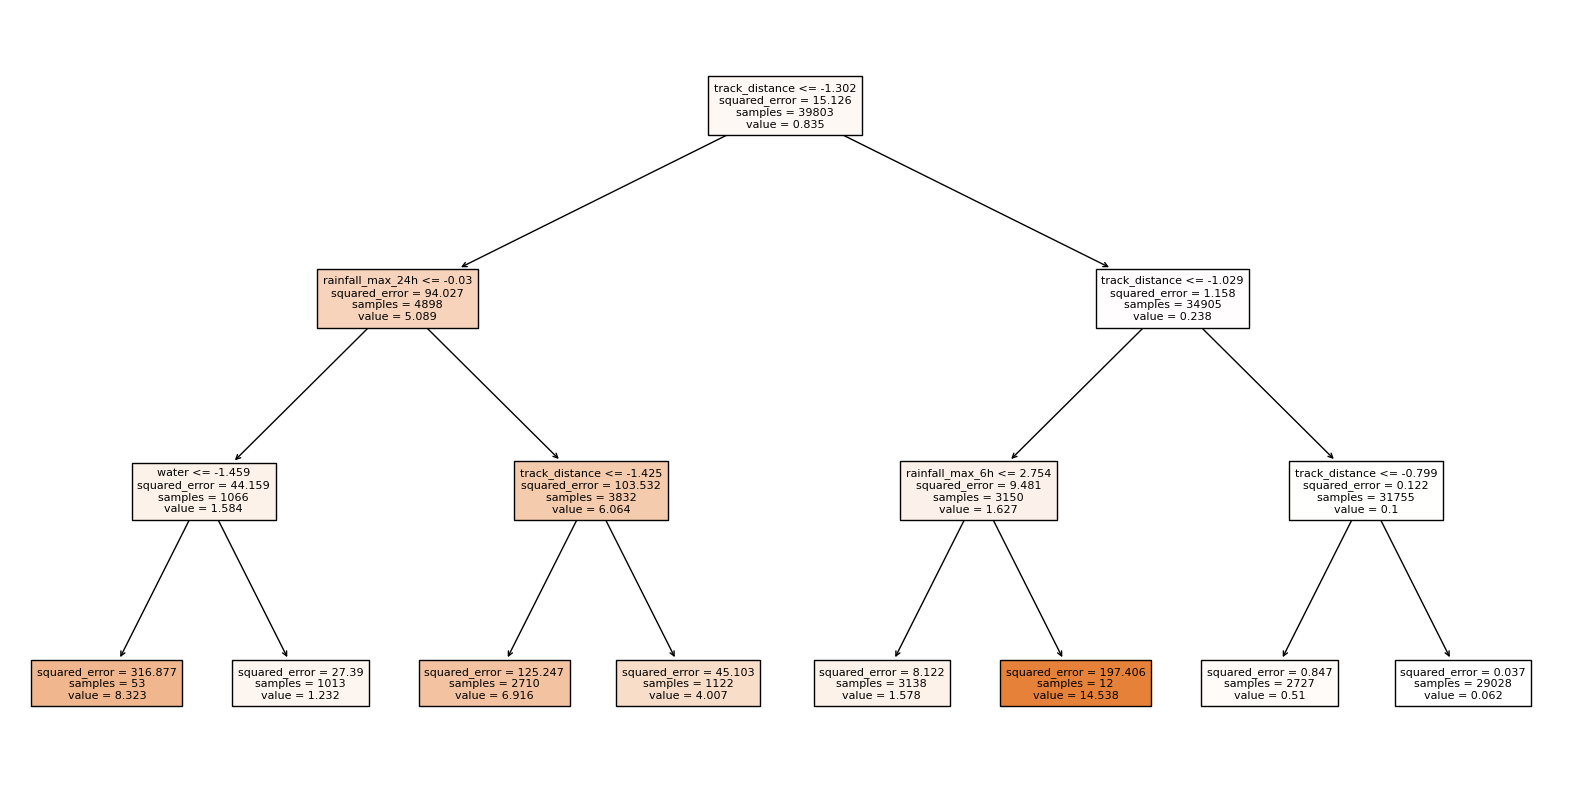

In [203]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3)
dt.fit(X_train_df[shap_list[1:]], y_trainxgb)
y_pred = dt.predict(X_test_df[shap_list[1:]])
mse = mean_squared_error(y_testxgb, y_pred)

print("MSE: ", mse)
print("RMSE: ", np.sqrt(mse))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=features[1:], filled=True, fontsize=8)

# Lists

In [247]:
shap_list = ['wind_speed', 'track_distance', 'rainfall_max_6h',
       'percent_houses_damaged_5years', 'rainfall_max_24h', 'urban',
       'mean_elev', 'coast_length', 'total_houses', 'rwi', 'std_slope',
       'mean_slope', 'total_pop', 'mean_tri', 'water', 'rural', 'std_tri',
       'with_coast']


lime_list = ['wind_speed',
 'track_distance',
 'rwi',
 'rainfall_max_6h',
 'percent_houses_damaged_5years',
 'rainfall_max_24h',
 'urban',
 'mean_elev',
 'coast_length',
 'rural',
 'std_slope',
 'total_pop',
 'water',
 'mean_tri',
 'total_houses',
 'std_tri',
 'with_coast',
 'mean_slope']

xgb_list = ['wind_speed',
 'std_tri',
 'track_distance',
 'with_coast',
 'rainfall_max_24h',
 'mean_tri',
 'percent_houses_damaged_5years',
 'rainfall_max_6h',
 'mean_slope',
 'std_slope',
 'total_pop',
 'mean_elev',
 'water',
 'total_houses',
 'rural',
 'rwi',
 'coast_length',
 'urban']